<a href="https://colab.research.google.com/github/udita1903/NLP/blob/main/Sentiment%20Analysis/IMDB%20Movie%20Reviews/IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy


In [3]:
#plain reviews datasets
text,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)
#subword reviews
subword_text,subword_info=tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXMVBRV/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXMVBRV/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXMVBRV/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3OXKP6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3OXKP6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3OXKP6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpsqhujf3htfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [5]:
print(info.features)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})


In [6]:
print(len(info.features))

2


In [7]:
print(subword_info.features)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})


In [8]:
# Take 2 training examples and print the text feature
for example in text['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [9]:
for i in subword_text['train'].take(2):
  print(i)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [10]:
#to get the tokenizer you will use the encoder
#subwords dataset is already tokenized, use encoder to get the text data
tokenizer_subword=subword_info.features['text'].encoder
for i in subword_text['train'].take(2):
  print(tokenizer_subword.decode(i[0])) #i[0] is the text,i[1] is the sentiment

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [11]:
#subword encoding
training=text['train']#contains both sentences and labels
train_sentences=[]

for s,l in training:
  train_sentences.append(s.numpy().decode('utf8'))

In [12]:
vocab_size=10000
oov_tok='<oov>'

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
sequences=tokenizer.texts_to_sequences(train_sentences)

In [13]:
print(len(tokenizer.word_index))


88583


In [14]:
print(subword_info)


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmptaq7xn0utfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False

In [15]:
print(tokenizer_subword)

<SubwordTextEncoder vocab_size=8185>


In [16]:
print(tokenizer_subword.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [17]:
#print some of the sequences
print(tokenizer.sequences_to_texts(sequences[0:1]))
print(sequences[0])
print(len(tokenizer.sequences_to_texts(sequences[0:1])[0].split()))
print(len(sequences[0]))

["this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it"]
[12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69, 229, 66, 2933, 16, 1, 2904, 1, 1, 1479, 4940, 3

The error you are encountering (TypeError: 'int' object is not iterable) is because the sequences_to_texts method expects a list of sequences, not an individual sequence. When you provide sequences[0], it's an individual sequence, not a list of sequences.

In [18]:
print(len(tokenizer.word_index))
print(len(tokenizer_subword.subwords))

88583
7928


Encoding the plain text using the subword encoder

In [19]:
tokenized_string=tokenizer_subword.encode(train_sentences[0])
print(tokenized_string)
print(tokenizer_subword.decode(tokenized_string))

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

Comparing the performance of a normal tokenizer and a subword tokenizer on the plain texts

In [20]:
sample="My name is udita and I am learning TensorFlow"
sequence=tokenizer.texts_to_sequences([sample])#you need to pass a list
print(sequence)
print(tokenizer.sequences_to_texts(sequence))

#using the subword tokenizer
seq=tokenizer_subword.encode(sample)
print(seq)
decoded=tokenizer_subword.decode(seq)
print(decoded)


[[59, 401, 7, 1, 3, 11, 242, 2798, 1]]
['my name is <oov> and i am learning <oov>']
[387, 769, 9, 1484, 2684, 7961, 5, 12, 258, 5635, 34, 6307, 2327, 4043, 2120]
My name is udita and I am learning TensorFlow


In [21]:
#Mapping for the subword tokenizer

for i in seq:
  print("{}-------->{}".format(i,tokenizer_subword.decode([i])))

387-------->My 
769-------->name 
9-------->is 
1484-------->ud
2684-------->ita
7961--------> 
5-------->and 
12-------->I 
258-------->am 
5635-------->learn
34-------->ing 
6307-------->Ten
2327-------->sor
4043-------->Fl
2120-------->ow


# Train the model using the pre tokenized dataset


In [22]:
buffer_size=10000
batch_size=64
train_data,test_data=subword_text['train'],subword_text['test']
train_data=train_data.shuffle(buffer_size)
train_data=train_data.padded_batch(batch_size)
test_data=test_data.padded_batch(batch_size)

In [23]:
embedding_dim=64

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subword.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
epochs = 10


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(train_data, epochs=epochs, validation_data=test_data)

Epoch 1/10
391/391 [==============================] - 85s 201ms/step - loss: 0.6867 - accuracy: 0.5464 - val_loss: 0.6563 - val_accuracy: 0.6529
Epoch 2/10
391/391 [==============================] - 49s 125ms/step - loss: 0.5311 - accuracy: 0.7891 - val_loss: 0.4379 - val_accuracy: 0.8336
Epoch 3/10
391/391 [==============================] - 35s 90ms/step - loss: 0.3587 - accuracy: 0.8707 - val_loss: 0.3520 - val_accuracy: 0.8676
Epoch 4/10
391/391 [==============================] - 28s 71ms/step - loss: 0.2895 - accuracy: 0.8949 - val_loss: 0.3244 - val_accuracy: 0.8732
Epoch 5/10
391/391 [==============================] - 22s 55ms/step - loss: 0.2515 - accuracy: 0.9096 - val_loss: 0.3122 - val_accuracy: 0.8772
Epoch 6/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2291 - accuracy: 0.9181 - val_loss: 0.3172 - val_accuracy: 0.8717
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.2090 - accuracy: 0.9259 - val_loss: 0.3049 - val_accurac

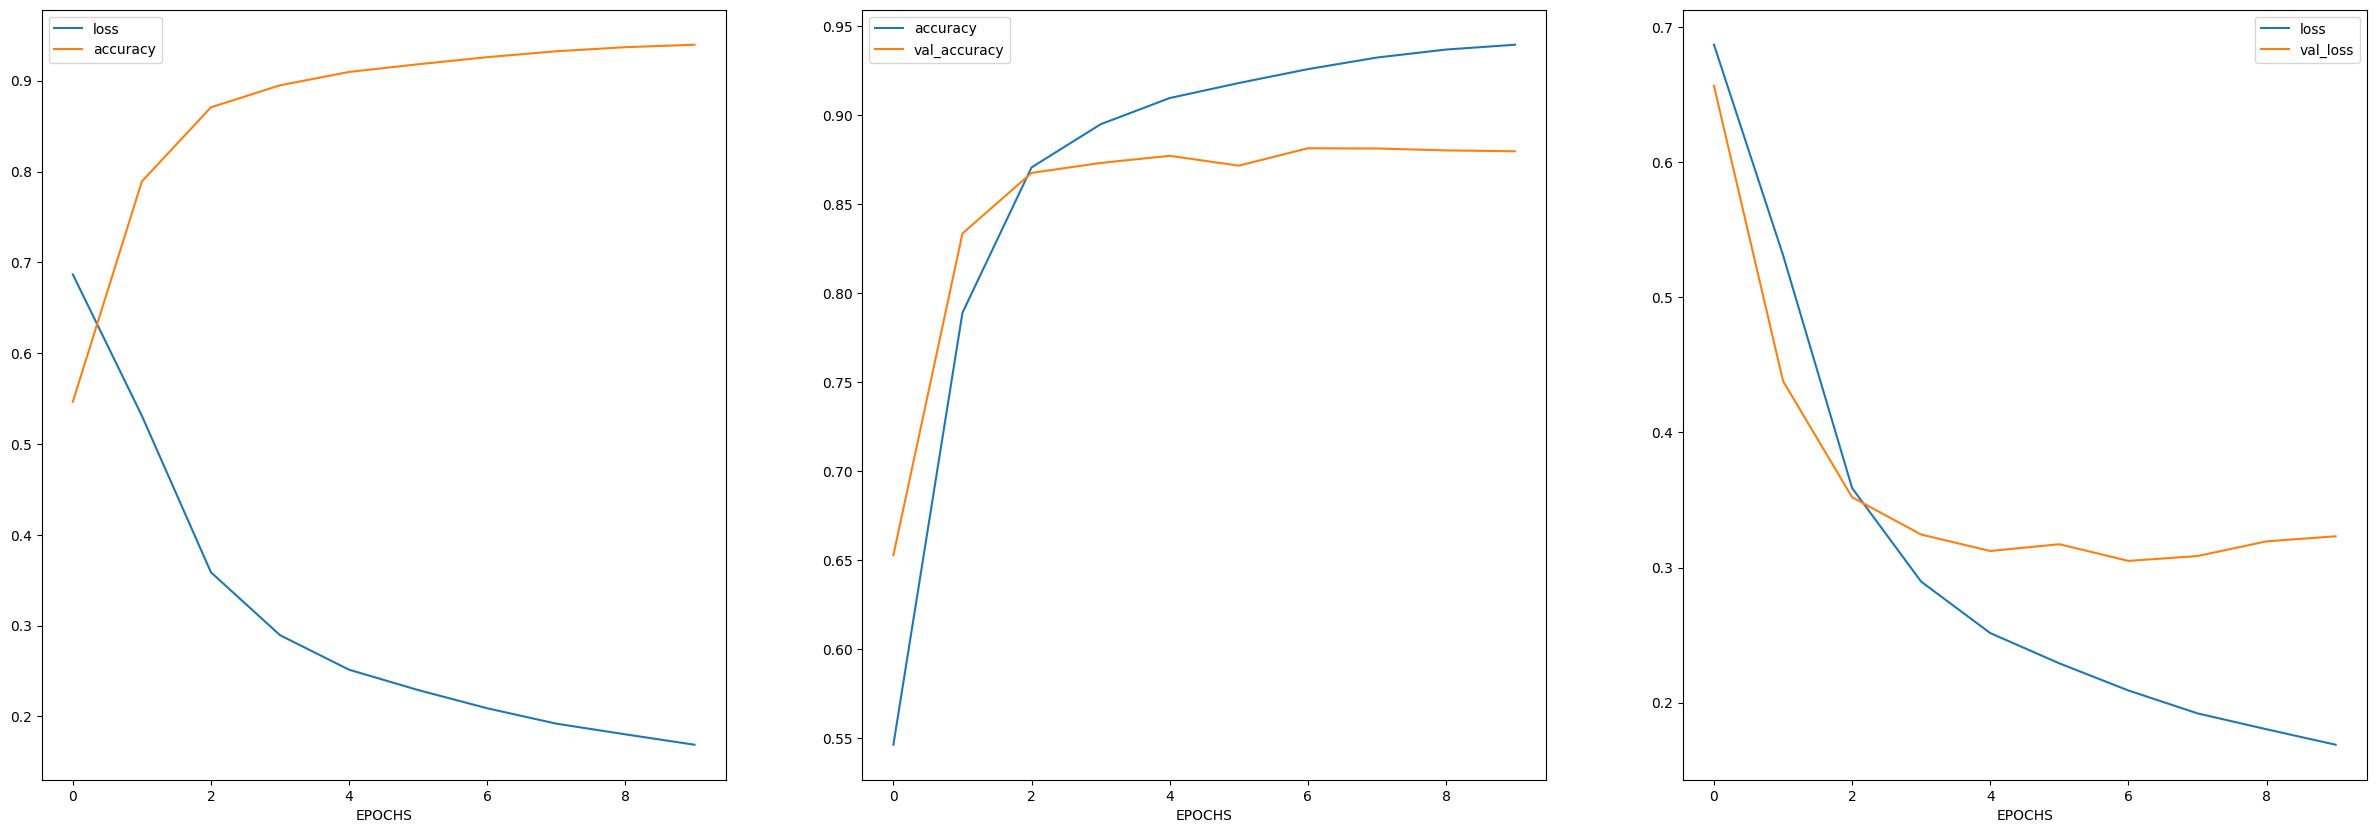

In [35]:
import matplotlib.pyplot as plt

def graph(model):
  plt.figure(figsize=(30,10))
  plt.subplot(1,3,1)
  plt.plot(model.history['loss'])
  plt.plot(model.history['accuracy'])
  plt.legend(['loss','accuracy'])
  plt.xlabel("EPOCHS")

  plt.subplot(1,3,2)
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.legend(['accuracy','val_accuracy'])
  plt.xlabel('EPOCHS')

  plt.subplot(1,3,3)
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.legend(['loss','val_loss'])
  plt.xlabel('EPOCHS')
graph(history)